<a href="https://colab.research.google.com/github/Abed221/IMDB-Recommendation-System/blob/main/IMDB_REC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

##Environment and collecting data

In [28]:
#Environment Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sb 
%matplotlib inline

We didn't need the actor name dataset because we can use the nconst as a reference number through the principal and basics datasets and match these with each other

In [3]:
!wget 'https://datasets.imdbws.com/title.basics.tsv.gz'
!wget 'https://datasets.imdbws.com/title.crew.tsv.gz'
!wget 'https://datasets.imdbws.com/title.ratings.tsv.gz'
!wget 'https://raw.githubusercontent.com/sahildit/IMDB-Movies-Extensive-Dataset-Analysis/master/data1/IMDb%20movies.csv'

--2022-01-02 18:58:54--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 54.230.19.127, 54.230.19.99, 54.230.19.50, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|54.230.19.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150069389 (143M) [binary/octet-stream]
Saving to: ‘title.basics.tsv.gz’

title.basics.tsv.gz 100%[===================>] 143.12M  31.5MB/s    in 4.1s    

2022-01-02 18:58:58 (35.3 MB/s) - ‘title.basics.tsv.gz’ saved [150069389/150069389]

--2022-01-02 18:58:58--  https://datasets.imdbws.com/title.crew.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 54.230.19.127, 54.230.19.99, 54.230.19.50, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|54.230.19.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58444351 (56M) [binary/octet-stream]
Saving to: ‘title.crew.tsv.gz’

title.crew.tsv.gz   100%[===================>]  55.74M  

In [4]:
!gunzip /content/title.basics.tsv.gz
!gunzip /content/title.crew.tsv.gz
!gunzip /content/title.ratings.tsv.gz

In [5]:
principals = pd.read_csv('title.crew.tsv', sep='\t')
movies = pd.read_csv('title.basics.tsv', sep='\t')
ratings = pd.read_csv('title.ratings.tsv', sep='\t')
languages = pd.read_csv('IMDb movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Cleaning Data in the final dataframe

In [6]:
#Ratings
movies = pd.merge(movies, ratings, on=['tconst'])

#Directors
movies = pd.merge(movies, principals, on=['tconst'])

#preparing languages dataframe for the merge
languages.rename(columns={'imdb_title_id': 'tconst'}, inplace=True)
movies = pd.merge(movies, languages[['language', 'tconst', 'director']], how='left', on=['tconst'])

In [7]:
#Fitering unwanted titletypes
movies.drop('primaryTitle', axis=1, inplace=True)
movies = movies[movies['titleType'] != 'tvPilot']
movies = movies[movies['titleType'] != 'videoGame']
movies = movies[movies['titleType'] != 'tvShort']
movies = movies[movies['titleType'] != 'video']
movies = movies[movies['titleType'] != 'tvEpisode']
movies = movies[movies['titleType'] != 'Short']

In [8]:
# Changing startyear dtype and incorrect values
movies['startYear'].replace(to_replace = r"\N", value= 2000, inplace=True)
movies['startYear'] = pd.to_numeric(movies['startYear'])

In [9]:
# Filtering irrelevant movies with awful rating/not released yet
movies = movies[movies['averageRating'] >= 2.0]
movies = movies[movies['numVotes'] >= 1000]
movies = movies[movies['startYear'] < 2023]

In [10]:
# Splitting Genres text values to multiple genre columns
new = movies["genres"].str.split(",", n=2 ,expand = True)
  
# making separate first name column from new data frame
movies["genre1"]= new[0]
movies["genre2"]= new[1]
movies["genre3"]= new[2]
  
# Dropping old Name columns
movies.drop(columns =["genres"], inplace = True)

In [11]:
movies['numVotes'].fillna(value= 0,inplace=True)
movies['numVotes'].replace(to_replace = '\n', value = 0)
movies['language'].fillna(value='none', inplace=True)

##Checking the final dataframe

In [29]:
movies.head(1)

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,writers,language,director,genre1,genre2,genre3
0,tt0000001,short,Carmencita,0,1894,\N,1,5.7,1847,nm0005690,\N,none,NaN,Documentary,Short,None


(array([4.91259190e-04, 2.31009384e-04, 1.39838216e-04, 9.38172082e-05,
        6.87635589e-05, 5.21504438e-05, 4.18342353e-05, 3.43650323e-05,
        2.93074106e-05, 2.24745972e-05]),
 array([1000., 1830., 2660., 3490., 4320., 5150., 5980., 6810., 7640.,
        8470., 9300.]),
 <a list of 10 Patch objects>)

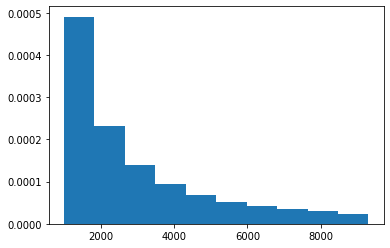

In [38]:
plt.hist(movies['numVotes'], density=True, range=[1000, 9300])

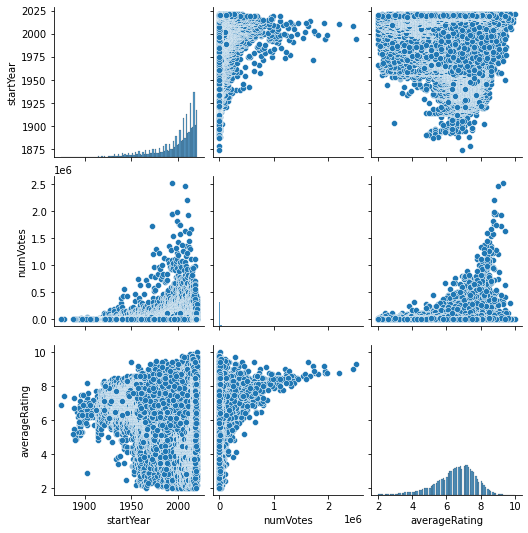

In [37]:
sb.pairplot(movies[['startYear', 'numVotes', 'averageRating']])

#Movie name input

---



---



In [17]:
#Original title
title = input()

#Year of production
year = input()
year = int(year)

#ٍSepcify Title Type
titletype = movies[(movies['originalTitle']==title) & (movies['startYear']==year)]['titleType'].iloc[0]
#Movie genre
genre = movies[(movies['originalTitle'] == title) & (movies['startYear']==year)]['genre1'].iloc[0]

#Movie Director
director = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['directors'].iloc[0]

#other sources for movies directors using the director column
#if director == '/N':
  #director = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['director'].iloc[0]


#Movie Average Rating
rating = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['averageRating'].iloc[0]

#Movie Original Language
language = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['language'].iloc[0]

Dune: Part One
2021


In [18]:
print(genre)
print(director)
print(year)
print(titletype)
print(language)

Action
nm0898288
2021
movie
none


In [39]:
#output 1 (Genre + Better rating than input + Same media type + Language)
result = movies[(movies['genre1'] == genre) & (movies['titleType']==titletype) & (movies['language']==language) & (movies['averageRating']>=rating)]['originalTitle'].sample().iloc[0]

#output 2 (Genre + Better than constant rating + Same media type)
result2 = movies[(((movies['genre1'].str.contains(genre, case=False)) | (movies['genre2'].str.contains(genre, case=False)) | (movies['genre3'].str.contains(genre, case=False)))) & (movies['titleType']==titletype) & (movies['averageRating']>=6.0)]['originalTitle'].sample().iloc[0]


#Final Output 

In [40]:
result, result2

('Maro Prasthanam', 'Nikita')

#ٌTesting Region

In [ ]:
movies[(movies['genre1'] == genre) & (movies['titleType']==titletype) & (movies['language']==language) & (movies['averageRating']>=rating)]['originalTitle']

1071043    Tenet
Name: originalTitle, dtype: object

In [16]:
movies[movies['originalTitle']==( "Dune: Part One")]

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,writers,language,director,genre1,genre2,genre3
526215,tt1160419,movie,Dune: Part One,0,2021,\N,155,8.2,417397,nm0898288,"nm3123612,nm0898288,nm0744839,nm0378541",none,NaN,Action,Adventure,Drama


In [ ]:
movies[movies['numVotes']== 0]

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,genre1,genre2,genre3


In [ ]:
movies['numVotes'].describe()

count    4.768100e+04
mean     2.150158e+04
std      7.986732e+04
min      1.000000e+03
25%      1.615000e+03
50%      3.103000e+03
75%      9.302000e+03
max      2.501754e+06
Name: numVotes, dtype: float64

In [ ]:
movies['nu'].dropna(inplace=True)

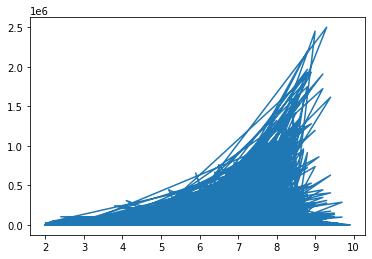

In [ ]:
plt.plot(movies['averageRating'], movies['numVotes'])

In [ ]:
movies['numVotes'].sample(n=50)

1004567     690.0
107588       34.0
1018813       5.0
186553       10.0
311361      253.0
190923     3293.0
1186833     187.0
885686       68.0
289274       39.0
152497      738.0
49327      1073.0
439565       54.0
214763     1112.0
17248      1205.0
68272       203.0
1078702      67.0
341071       14.0
253601       16.0
271226      544.0
373963       15.0
87297       172.0
444390       15.0
312956       31.0
875188       10.0
194711       14.0
97684        21.0
313886       19.0
376185      122.0
105069      158.0
331691       59.0
445971       39.0
160115      164.0
279616       37.0
224385       14.0
930796      326.0
806416       37.0
275681       20.0
401415       11.0
959786        6.0
1190129      12.0
113393       39.0
14004        23.0
1075528      26.0
477802        7.0
22457       140.0
351493      130.0
44769       187.0
138078      402.0
110318      130.0
102479       98.0
Name: numVotes, dtype: float64

In [ ]:
movies['language'].value_counts()

English                                            35929
French                                              3902
Spanish                                             2831
Japanese                                            2826
Italian                                             2731
                                                   ...  
French, Hungarian, Italian, Swiss German, Latin        1
Bosnian, Serbian, Croatian                             1
French, German, English, Flemish, Japanese             1
Catalan, English, Spanish                              1
Spanish, Danish, French                                1
Name: language, Length: 4377, dtype: int64

In [ ]:
movies[movies['directors']==( "nm0583600")][['originalTitle', 'averageRating']]

,originalTitle,averageRating
31310,The Parent Trap,6.6
36388,What Women Want,6.4
42542,Something's Gotta Give,6.7
47628,The Holiday,6.9
55724,It's Complicated,6.5
66629,The Intern,7.1


In [ ]:
movies.head()

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,writers,language,director,genre1,genre2,genre3
0,tt0000001,short,Carmencita,0,1894,\N,1,5.7,1846,nm0005690,\N,none,NaN,Documentary,Short,None
2,tt0000003,short,Pauvre Pierrot,0,1892,\N,4,6.5,1608,nm0721526,\N,none,NaN,Animation,Comedy,Romance
4,tt0000005,short,Blacksmith Scene,0,1893,\N,1,6.2,2431,nm0005690,\N,none,NaN,Comedy,Short,None
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,5.5,1992,nm0005690,\N,none,NaN,Documentary,Short,None
9,tt0000010,short,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,6.9,6650,nm0525910,\N,none,NaN,Documentary,Short,None


# EMAILING RESULTS

In [ ]:
import smtplib, ssl

port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = 'enter sender mail address:'  # Enter your address
receiver_email = 'enter receiver mail address:'  # Enter receiver address
password = "Type your password and press enter: "
message = 'enter myour message:'

context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, message)